Epoch 1/20


c:\Users\ASLAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.7693 - val_loss: 5.8530
Epoch 2/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.7197 - val_loss: 3.3452
Epoch 3/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6309 - val_loss: 1.8324
Epoch 4/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4434 - val_loss: 1.0210
Epoch 5/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8492 - val_loss: 0.7116
Epoch 6/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7596 - val_loss: 0.6087
Epoch 7/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8223 - val_loss: 0.5619
Epoch 8/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8388 - val_loss: 0.5431
Epoch 9/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8963 - val_loss: 0.5331
Epoch 10/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6167 - val_loss: 0.5262
Epoch 11/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8994 - val_loss: 0.5265
Epoch 12/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.

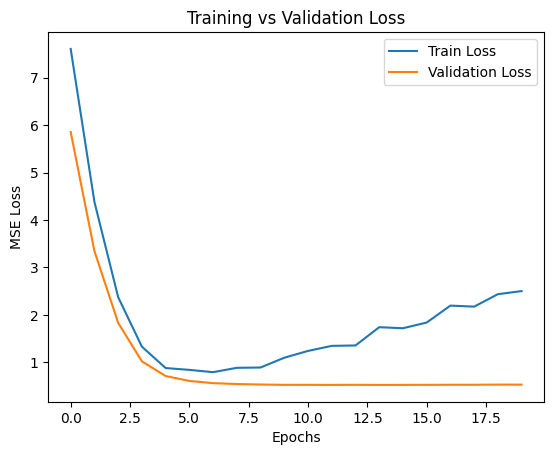

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

X = df.drop(columns=['Price'])
y = df['Price']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model=Sequential()
model.add(Dense(1, input_dim=X_train.shape[1]))
model.compile(optimizer=RMSprop(), loss='mse')

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=1)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()
